In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Building Simple linear regression model

using pandas for reading data

Text(0.5, 1.0, 'Scatter plot of Years of Experience vs Salary')

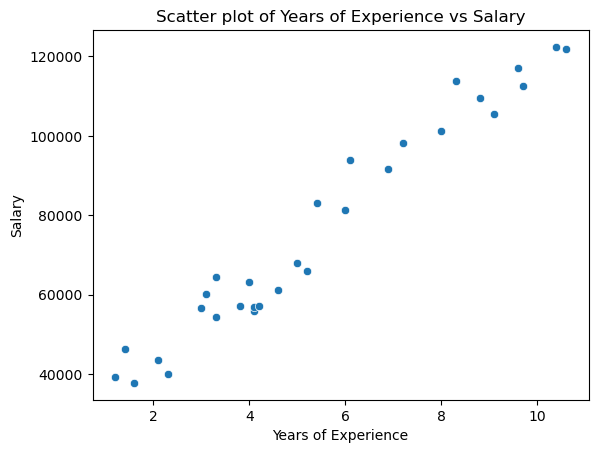

In [30]:
sns.scatterplot(x='YearsExperience',y='Salary',data=df)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter plot of Years of Experience vs Salary')

In [31]:
df=pd.read_csv('Salary_dataset.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


Seperating independent and dependent variables

In [32]:
X=df[['YearsExperience']] #we use double brackets to make it a dataframe
Y=df['Salary'] #if we use single bracket it becomes series

Spliting data into training and testing data using library called Scikit-learn
- from sklearn.model_selection import train_test_split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

Now we need to standardize the dataset to make all of them into same units

- we use sklearn.preprocessing.StandardScalar

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Now we need to train model based on the train data
- to create model we use from sklrean.linear_model import LinearRegression

In [36]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

model will return coefficient and intercept of the best line

In [37]:
print("Coefficient:",model.coef_)
print("Intercept:",model.intercept_)

Coefficient: [25063.1519945]
Intercept: 70417.40909090909


The red line indicates the best fit line and prediction line

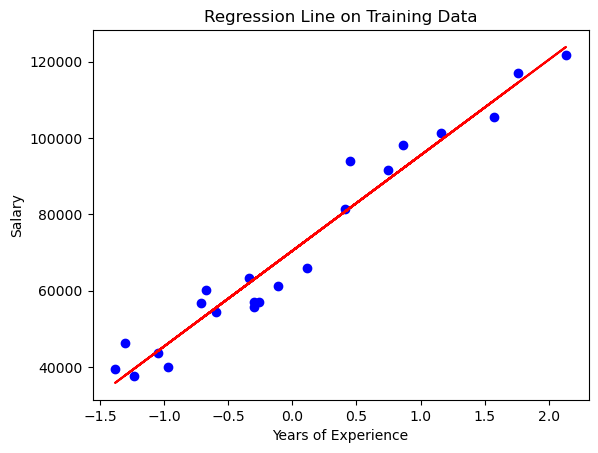

In [38]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,model.predict(x_train),color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regression Line on Training Data')
plt.show()

now we need to test the model and find the accuracy of the model


In [39]:
y_pred=model.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
mse

38802588.99247059

In [40]:
score = r2_score(y_test,y_pred)
score

0.9347210011126783

Manual testing

In [42]:
model.predict(scaler.transform([[5]]))

c:\Users\sanik\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([71397.10622651])